In [1]:
import numpy as np
import pandas as pd
import pickle as pk
import seaborn as sns
import sklearn.cluster as cluster
import string as st
import warnings
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from kneed import KneeLocator
from matplotlib import pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize as stt
from nltk.tokenize import word_tokenize as wtt
from pandas.core.dtypes.common import is_numeric_dtype as is_num
import plotly.express as px
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification as mc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import f_classif as fcf
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
warnings.filterwarnings("ignore")

# Data Analysis 

In [2]:
df = pd.read_excel('global_laptop_selling_data.xlsx')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [7]:
df.shape

(1303, 13)

In [8]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [9]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [10]:
df.corr(numeric_only = True)

,laptop_ID,Inches,Price_euros
laptop_ID,1.000000,-0.087796,0.067830
Inches,-0.087796,1.000000,0.068197
Price_euros,0.067830,0.068197,1.000000


In [11]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

# Bar Plot

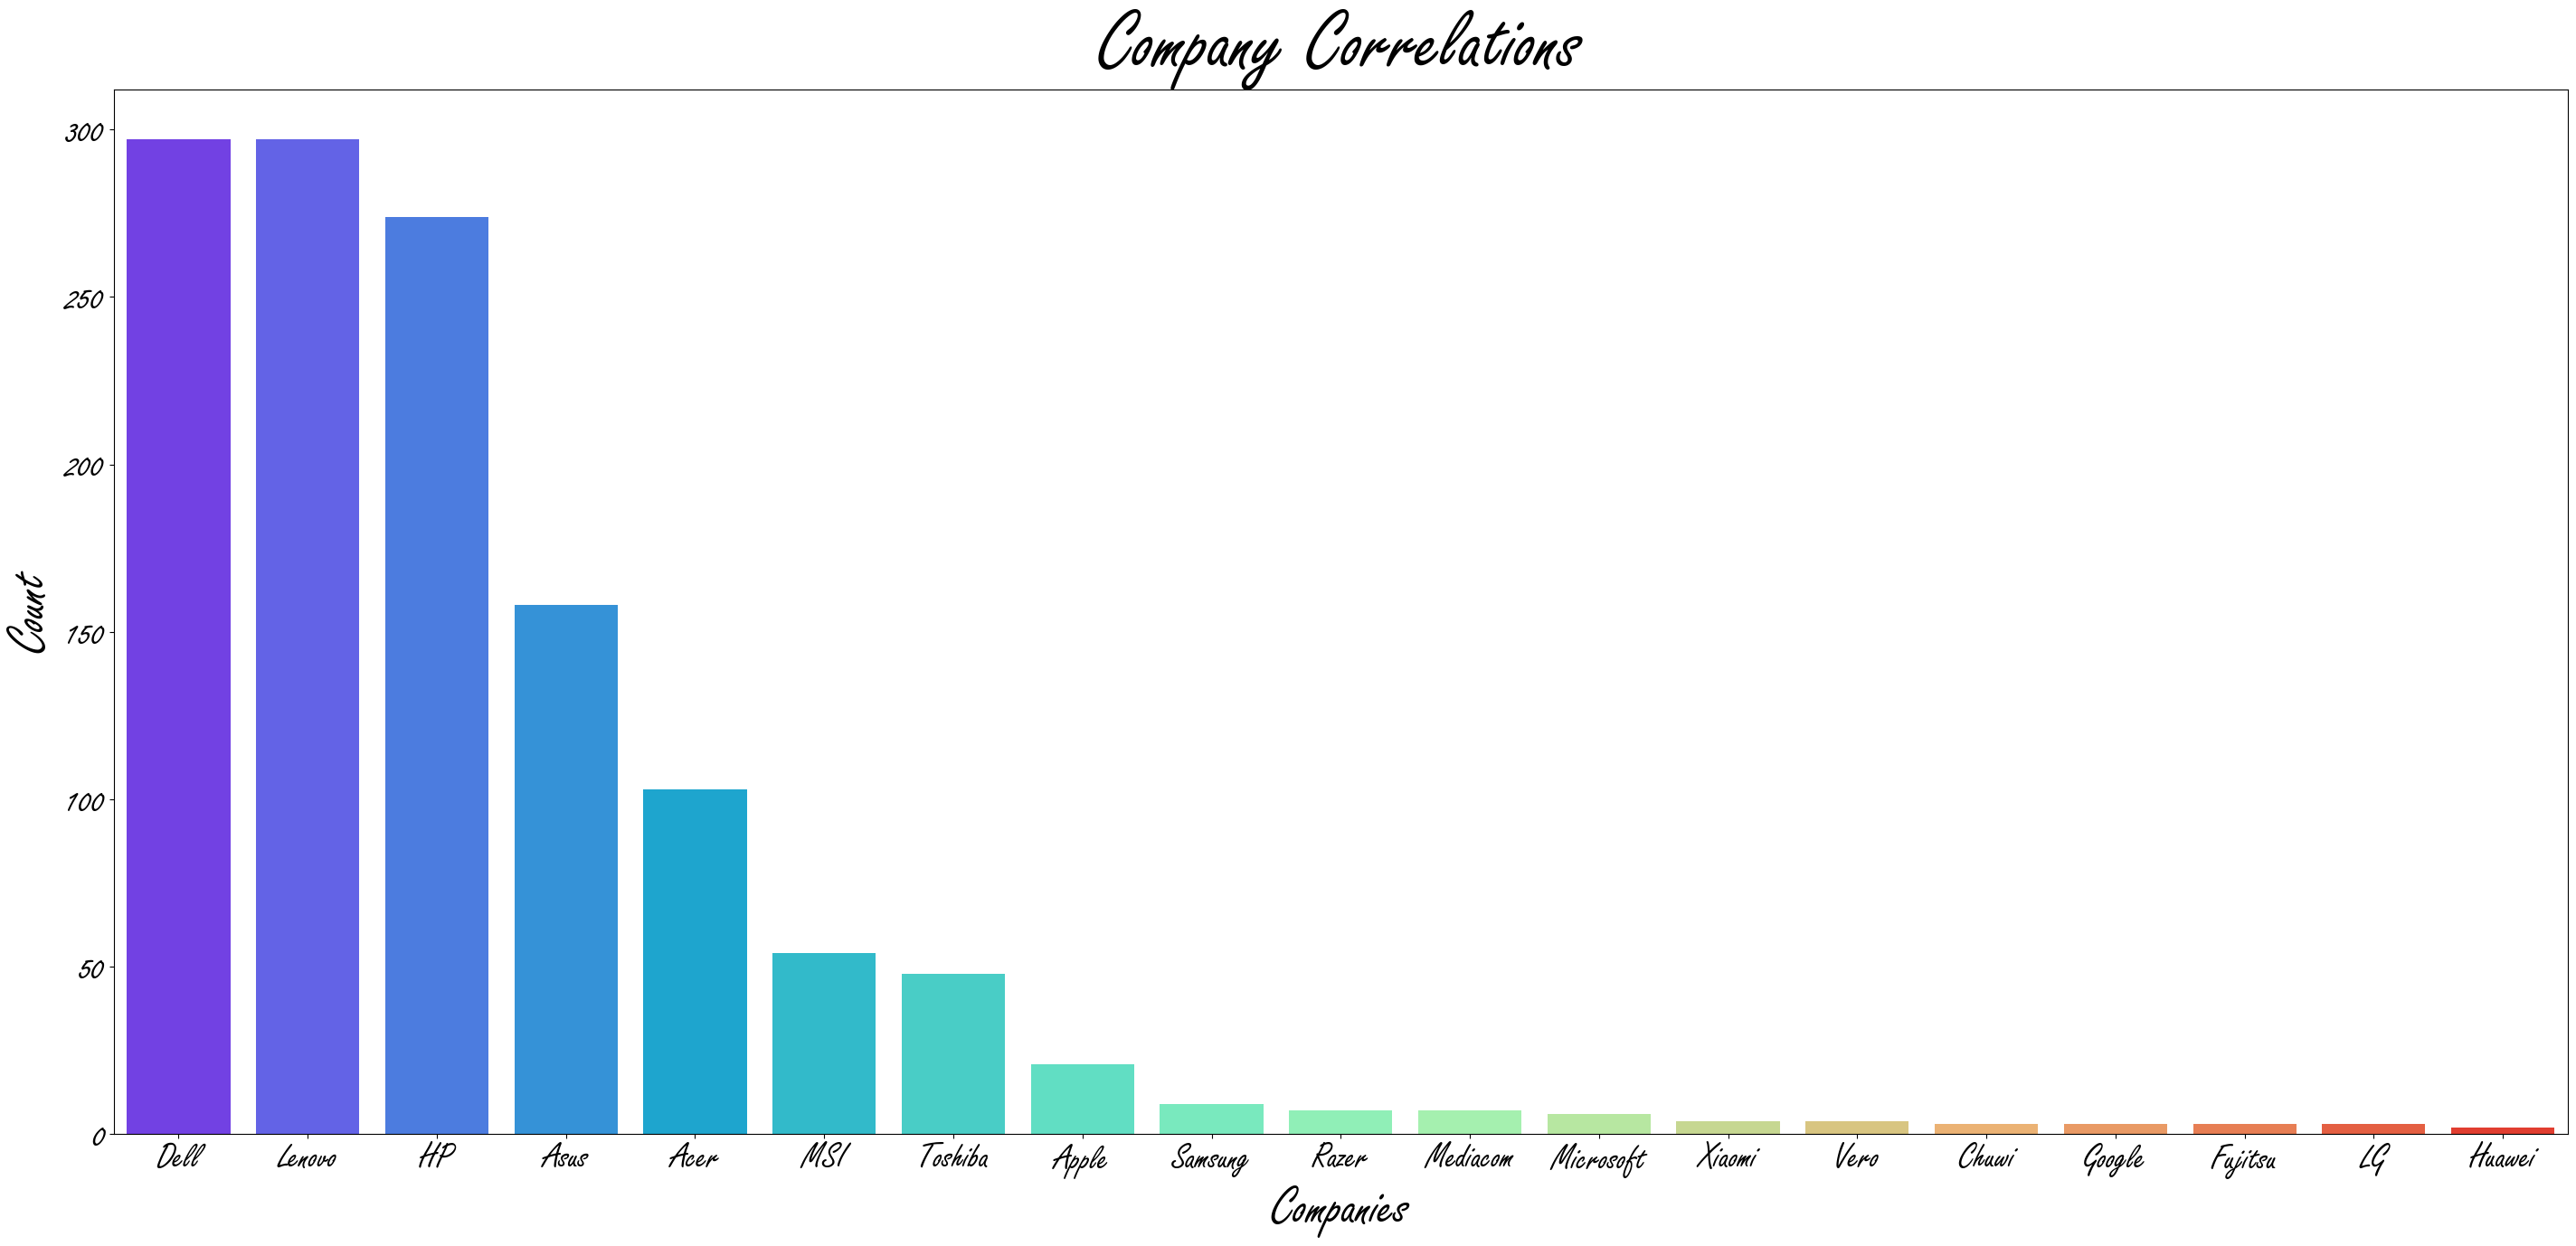

In [12]:
plt.figure(figsize = (35, 15))
sns.barplot(x = df['Company'].value_counts().index, y = df['Company'].value_counts().values, data = df, palette = 'rainbow', errcolor = 'black', errwidth = 2.0, capsize = 0.2).set_title('Company Correlations', fontsize = 70, fontweight = 'bold', fontname = 'Freestyle Script', color = 'black', loc = 'center', pad = 5.0, weight = 'bold')
plt.xlabel('Companies', fontsize = 45, fontweight = 'bold', fontname = 'Freestyle Script', color = 'black', labelpad = 5.0)
plt.ylabel('Count', fontsize = 45, fontweight = 'bold', fontname = 'Freestyle Script', color = 'black', labelpad = 5.0)
plt.xticks(fontsize = 30, fontweight = 'bold', fontname = 'Freestyle Script', color = 'black',rotation = 0)
plt.yticks(fontsize = 30, fontweight = 'bold', fontname = 'Freestyle Script', color = 'black',rotation = 0)
plt.show()

# Box Plot

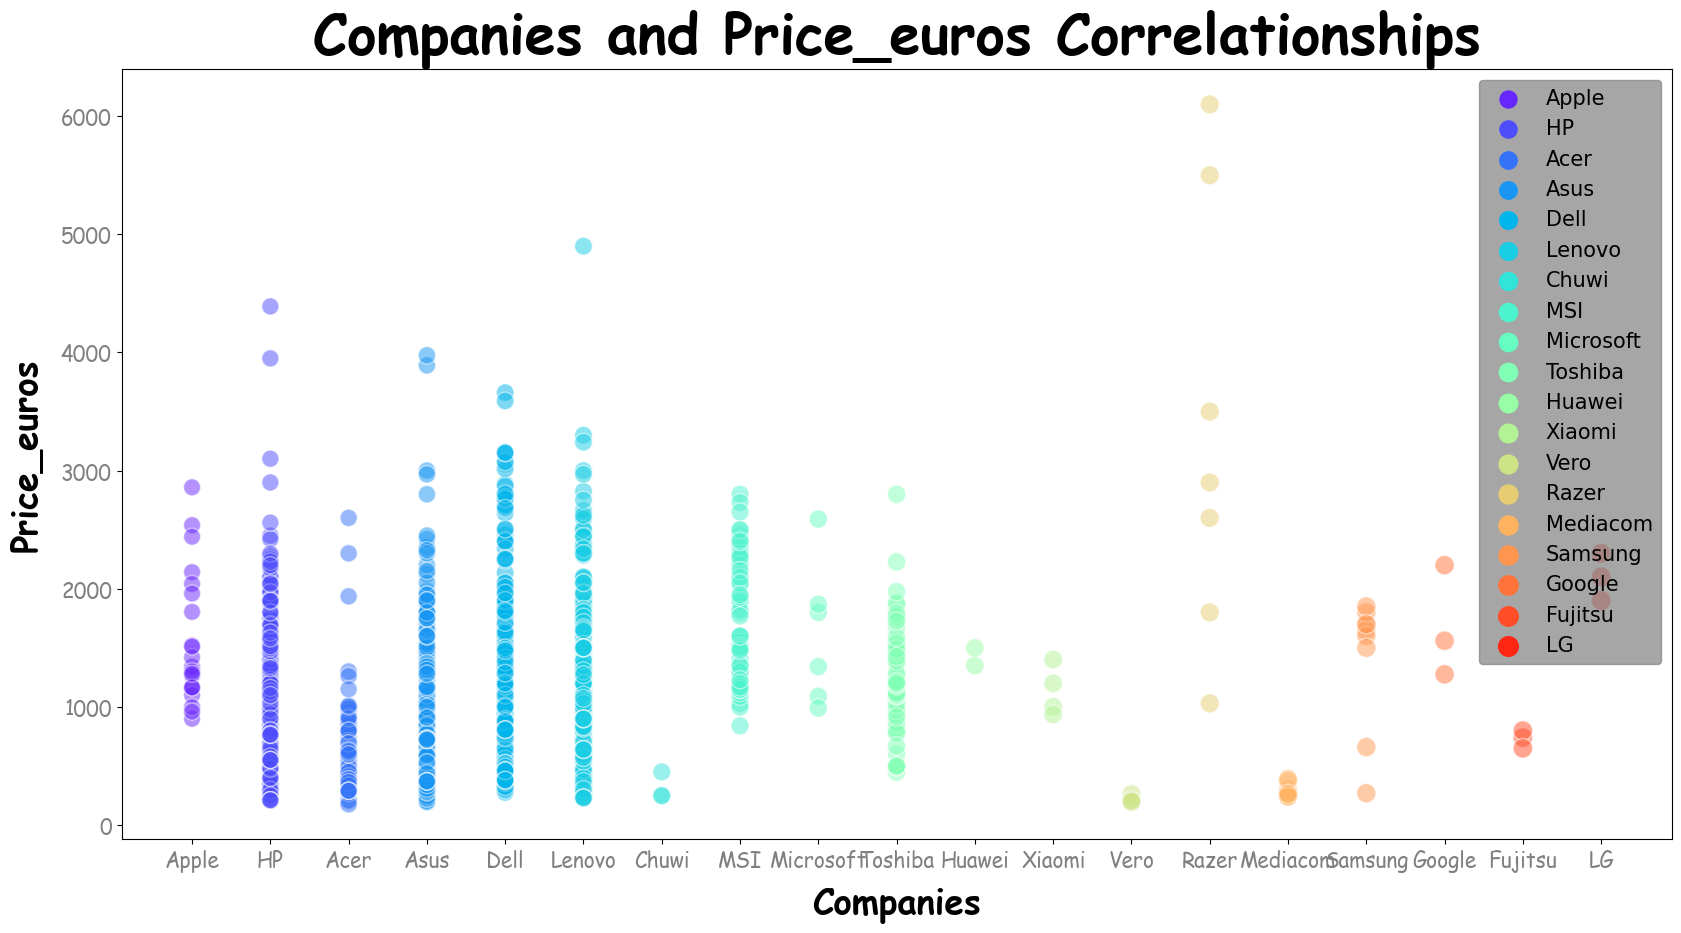

In [13]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x = df['Company'], y = df['Price_euros'], data = df, palette = 'rainbow', hue = df['Company'], size = df['Company'], sizes = (200, 150), alpha = 0.5).set_title('Companies and Price_euros Correlationships', fontsize = 40, fontweight = 'bold', fontname = 'Comic Sans MS', color = 'black', loc = 'center', pad = 5.0, weight = 'bold')
plt.xlabel('Companies', fontsize = 25, fontweight = 'bold', fontname = 'Comic Sans MS', color = 'black', labelpad = 10.0)
plt.ylabel('Price_euros', fontsize = 25, fontweight = 'bold', fontname = 'Comic Sans MS', color = 'black', labelpad = 10.0)
plt.xticks(fontsize = 15, fontname = 'Comic Sans MS', color = 'gray')
plt.yticks(fontsize = 15,fontname = 'Comic Sans MS', color = 'gray')
plt.legend(loc = 'upper right', fontsize = 15, facecolor = 'gray', edgecolor = 'gray', framealpha = 0.7)
plt.show()

#  Histplot

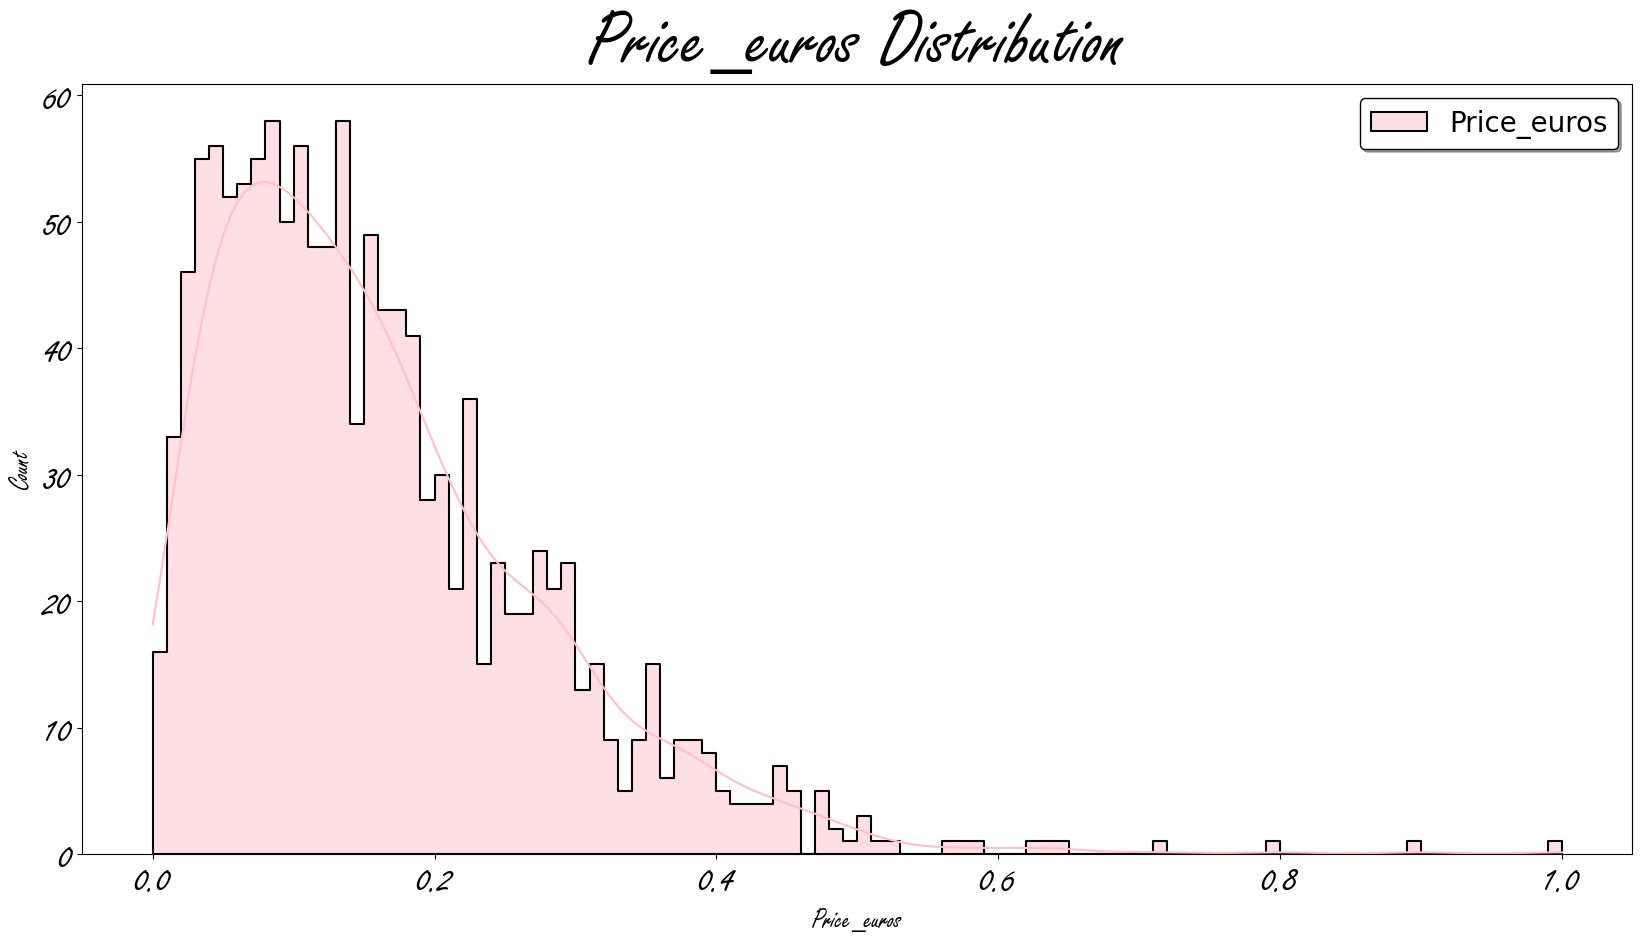

In [73]:
plt.figure(figsize = (20, 10))
sns.histplot(df['Price_euros'], kde = True, bins = 100, color = 'pink', edgecolor = 'black', linewidth = 1.5, alpha = 0.5, label = 'Price_euros', element = 'step', fill = True).set_title('Price_euros Distribution', fontsize = 60, fontweight = 'bold', fontname = 'Freestyle Script', color = 'black', loc = 'center', pad = 5.0, weight = 'bold')
plt.xlabel('Price_euros', fontsize = 20, fontweight = 'bold', fontname = 'Freestyle Script', color = 'black', labelpad = 5.0)
plt.ylabel('Count', fontsize = 20, fontweight = 'bold', fontname = 'Freestyle Script', color = 'black', labelpad = 5.0)
plt.xticks(fontsize = 30,fontname = 'Freestyle Script', color = 'black')
plt.yticks(fontsize = 30,fontname = 'Freestyle Script', color = 'black')
plt.legend(loc = 'upper right', fontsize = 20, markerscale = 1.5, frameon = True, edgecolor = 'black', facecolor = 'white', shadow = True, framealpha = 1.0, labelcolor = 'black')
plt.show()

#  Boxplot

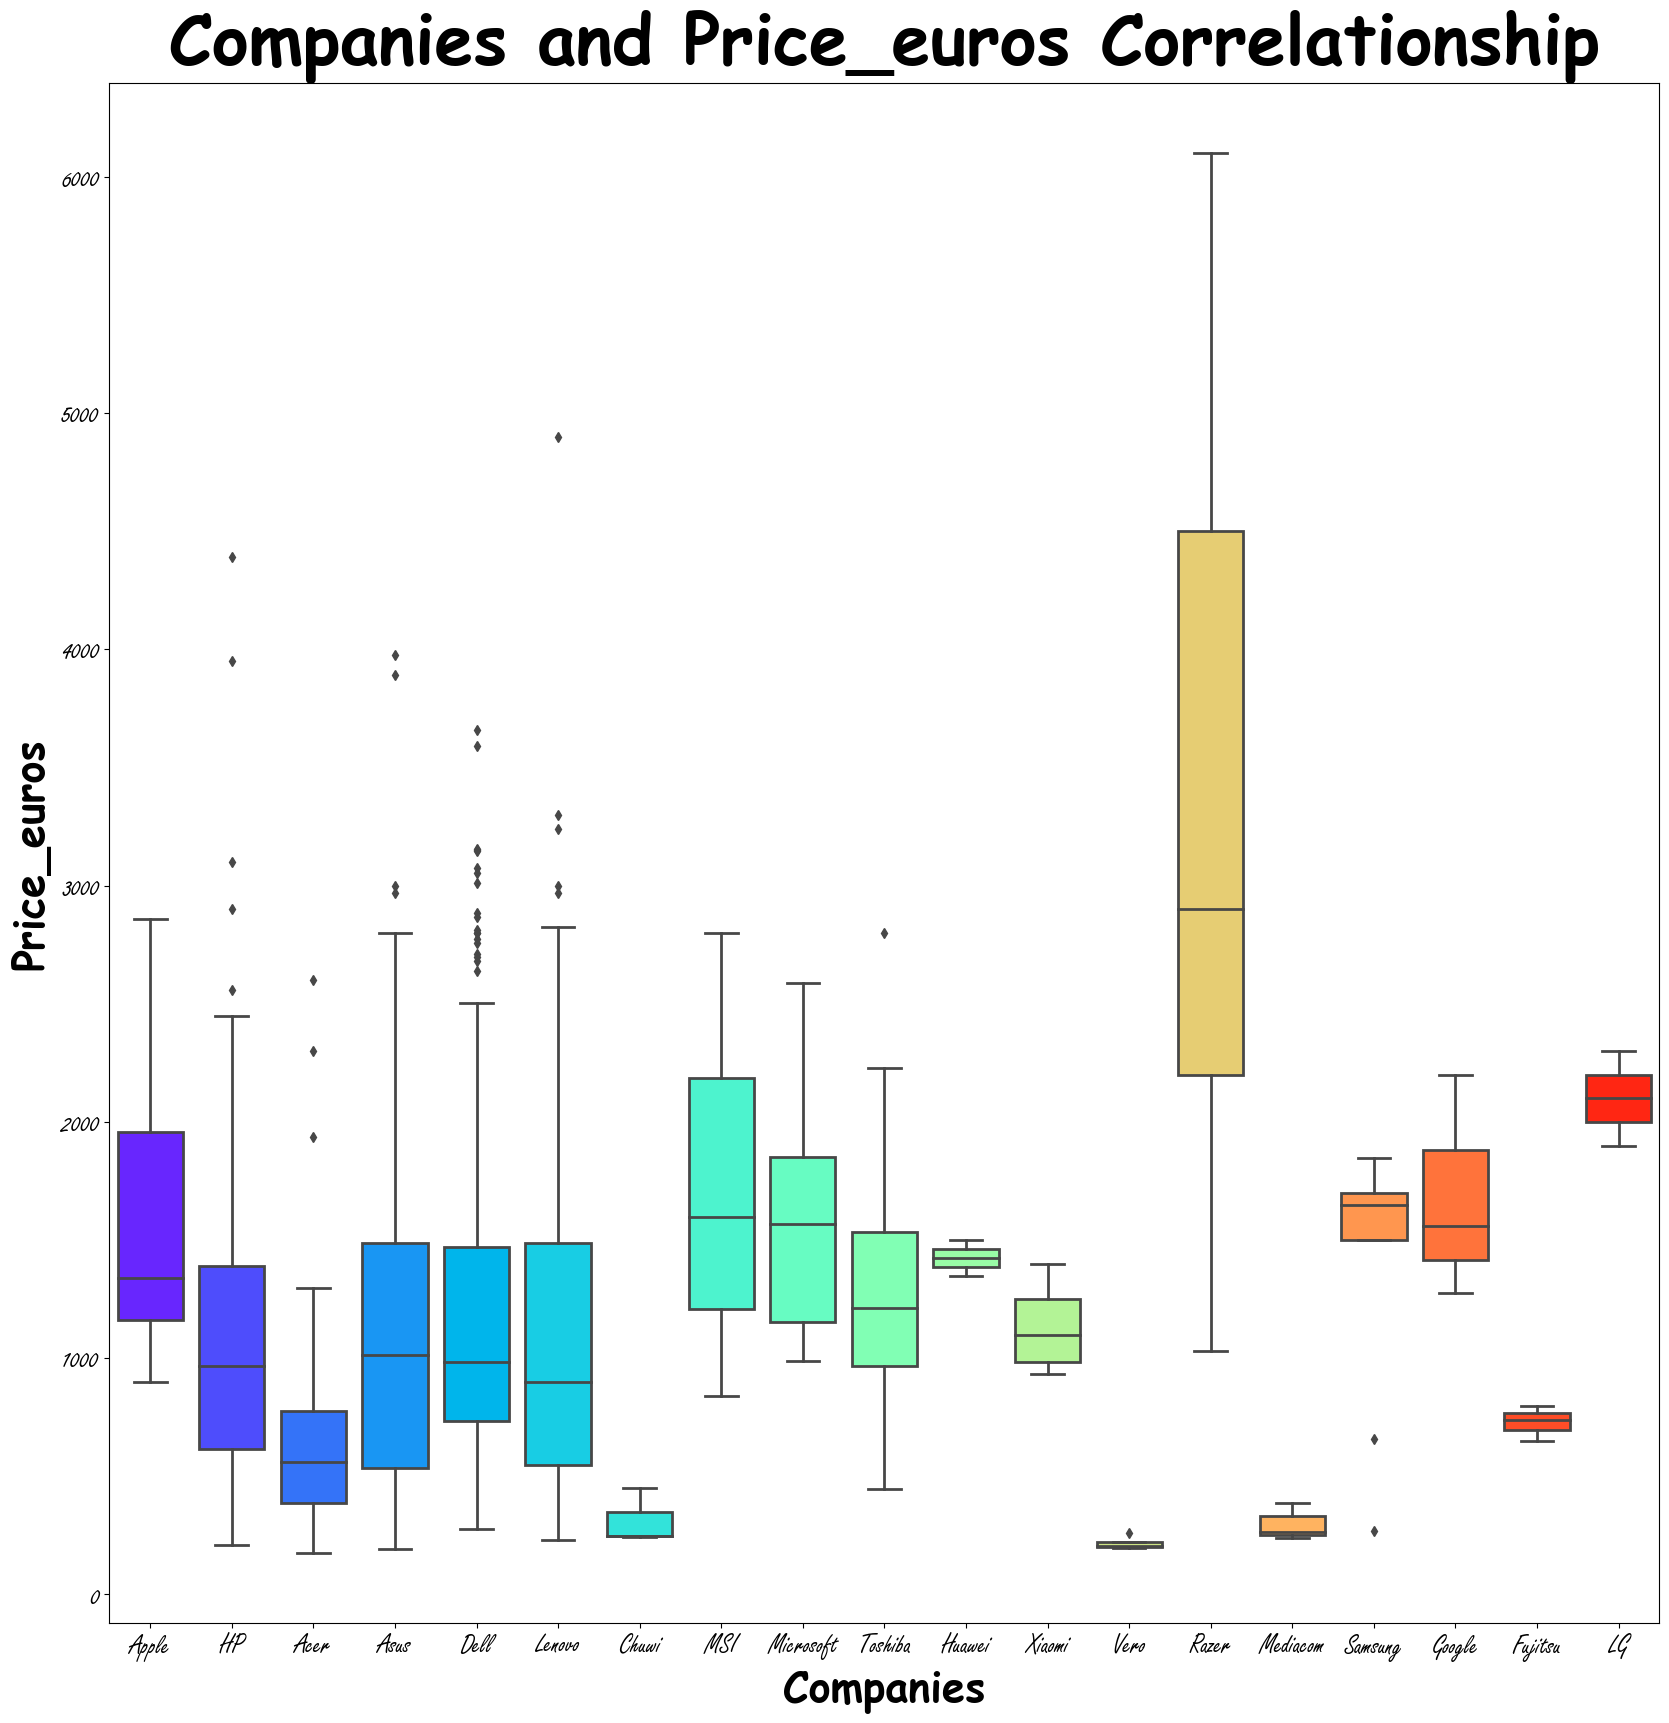

In [15]:
plt.figure(figsize = (20, 20))
sns.boxplot(x = df['Company'], y = df['Price_euros'], data = df, palette = 'rainbow', saturation = 1.0, width = 0.8, fliersize = 5.0, linewidth = 2.0, whis = 1.5).set_title('Companies and Price_euros Correlationship', fontsize = 50, fontweight = 'bold', fontname = 'Comic Sans MS', color = 'black', loc = 'center', pad = 5.0, weight = 'bold')
plt.xlabel('Companies', fontsize = 30, fontweight = 'bold', fontname = 'Comic Sans MS', color = 'black', labelpad = 5.0)
plt.ylabel('Price_euros', fontsize = 30, fontweight = 'bold', fontname = 'Comic Sans MS', color = 'black', labelpad = 5.0)
plt.xticks(fontsize = 20,fontname = 'Freestyle Script', color = 'black')
plt.yticks(fontsize = 20,fontname = 'Freestyle Script', color = 'black')
plt.show()

# Scatterplot

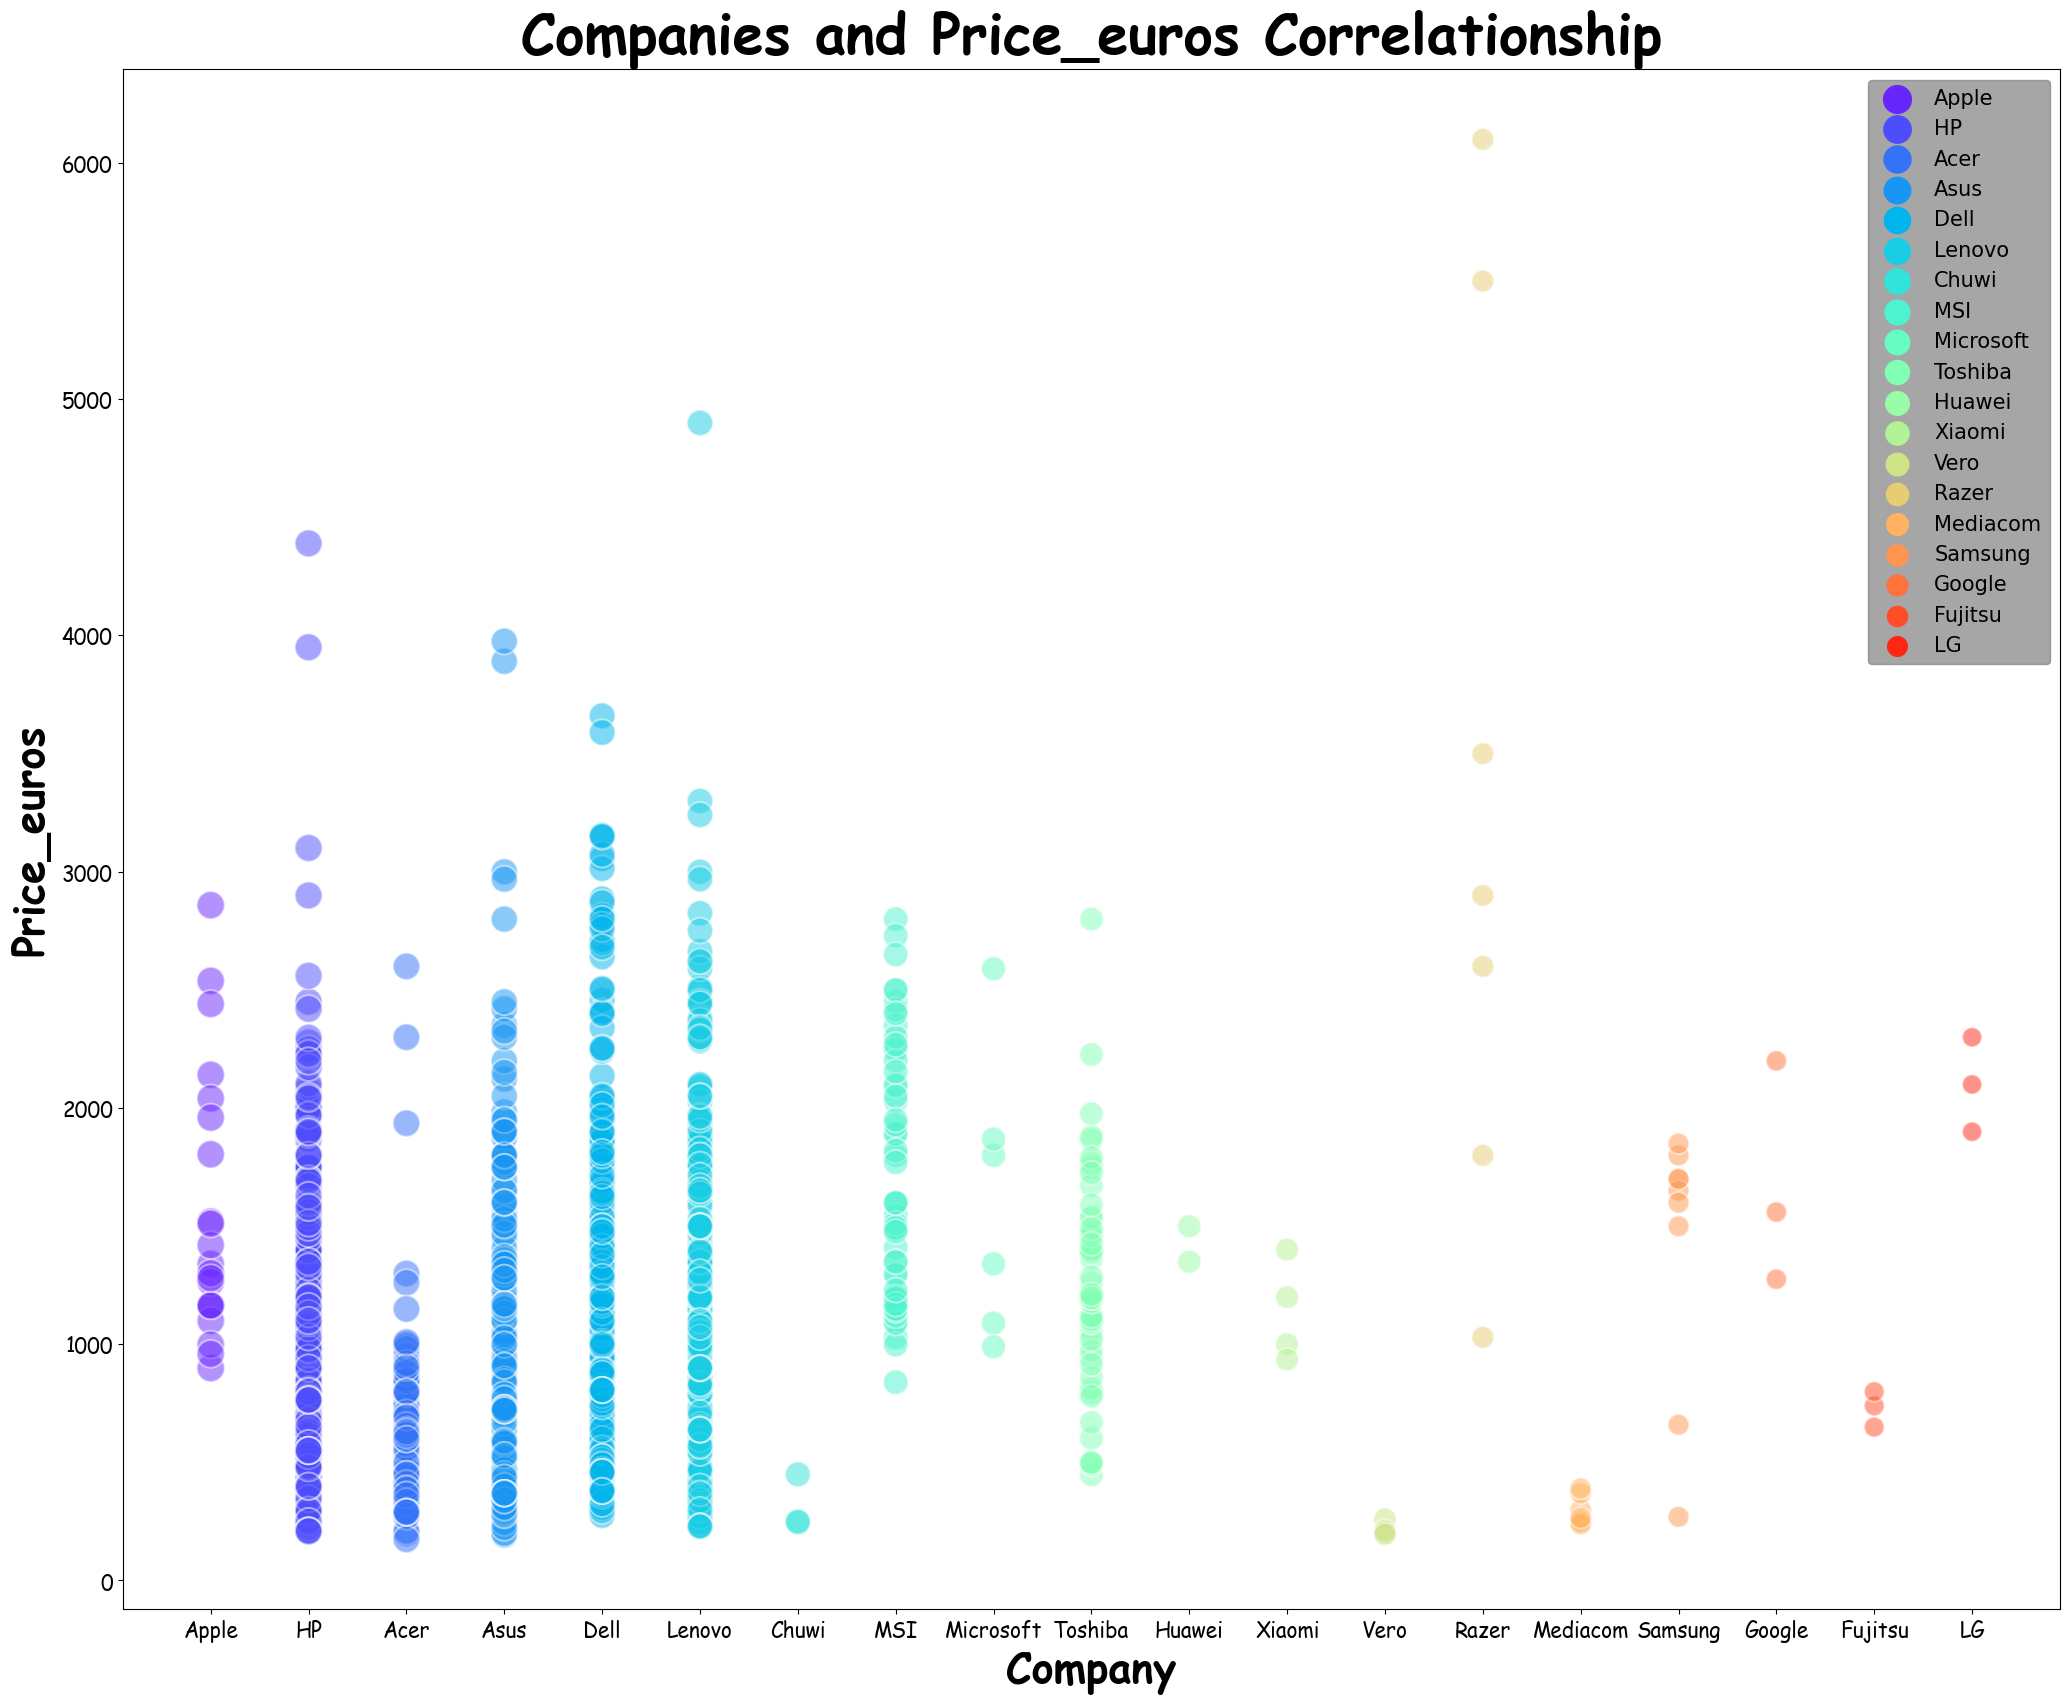

In [16]:
plt.figure(figsize = (25,20))
sns.scatterplot(x = df['Company'], y = df['Price_euros'], data = df, palette = 'rainbow', hue = df['Company'], size = df['Company'], sizes = (200, 400), alpha = 0.5).set_title('Companies and Price_euros Correlationship', fontsize = 40, fontweight = 'bold', fontname = 'Comic Sans MS', color = 'black', loc = 'center', pad = 5.0, weight = 'bold')
plt.xlabel('Company', fontsize = 30, fontweight = 'bold', fontname = 'Comic Sans MS', color = 'black', labelpad = 5.0)
plt.ylabel('Price_euros', fontsize = 30, fontweight = 'bold', fontname = 'Comic Sans MS', color = 'black', labelpad = 5.0)
plt.xticks(fontsize = 15,fontname = 'Comic Sans MS', color = 'black')
plt.yticks(fontsize = 15, fontname = 'Comic Sans MS', color = 'black')
plt.legend(loc = 'upper right', fontsize = 15, facecolor = 'gray', edgecolor = 'gray', framealpha = 0.7)
plt.show()

# Heatmap

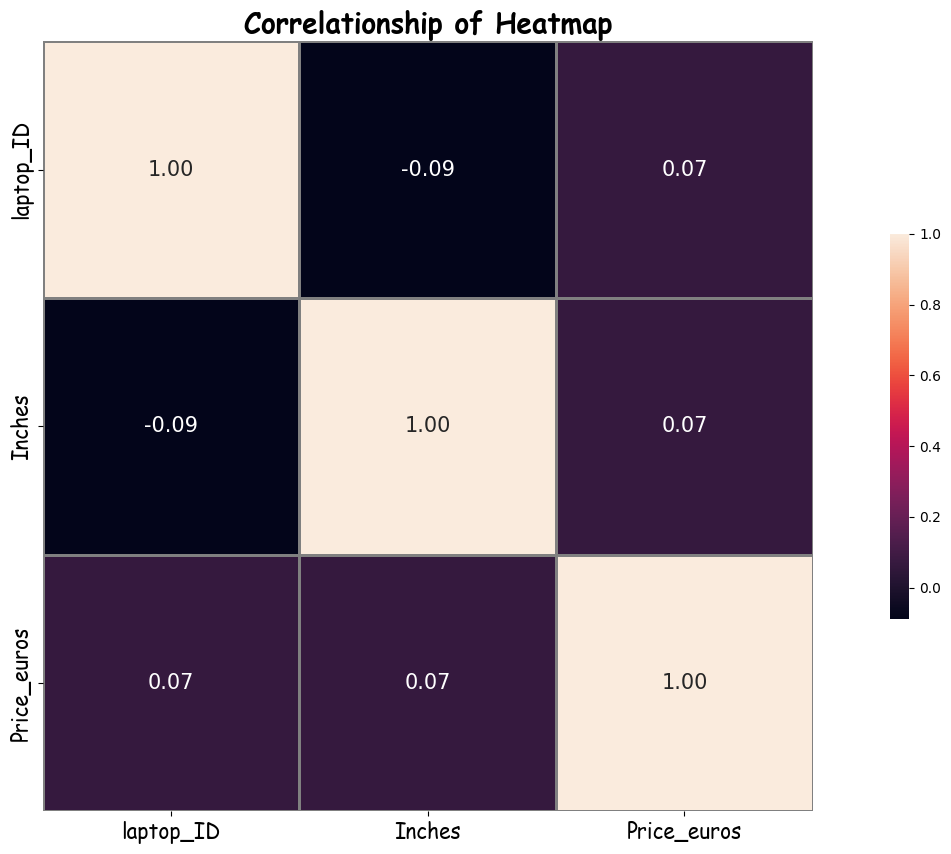

In [17]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, fmt = '.2f', linewidths = 2.0, linecolor = 'gray', square = True, annot_kws = {'size': 15}, cbar = True, cbar_kws = {'shrink': 0.5}).set_title('Correlationship of Heatmap', fontsize = 20, fontweight = 'bold', fontname = 'Comic Sans MS', color = 'black', loc = 'center', weight = 'bold')
plt.xticks(fontsize = 15,fontname = 'Comic Sans MS', color = 'black')
plt.yticks(fontsize = 15,fontname = 'Comic Sans MS', color = 'black')
plt.show()

#  Data Cleaning and Preprocessing

# 4.1 Handling Missing Values

In [18]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

*`[NO MISSING VALUES DETECTED]`*

### **`#4.2 Handling Duplicates`**

In [19]:
df.duplicated().sum()

0

*`[NO DUPLICATE VALUES DETECTED]`*

# Min-Max Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
mm = MinMaxScaler(feature_range = (0, 1))

In [22]:
df['Price_euros'] = mm.fit_transform(df[['Price_euros']])
df['Inches'] = mm.fit_transform(df[['Inches']])
df['laptop_ID'] = mm.fit_transform(df[['laptop_ID']])

In [23]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,0.000000,Apple,MacBook Pro,Ultrabook,0.385542,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,0.196741
1,0.000758,Apple,Macbook Air,Ultrabook,0.385542,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,0.122353
2,0.001516,HP,250 G6,Notebook,0.662651,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,0.067679
3,0.002274,Apple,MacBook Pro,Ultrabook,0.638554,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,0.398895
4,0.003033,Apple,MacBook Pro,Ultrabook,0.385542,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,0.275038


# Label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
for col in df.columns:
    if is_num(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [27]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,0.000000,1,300,4,0.385542,23,65,8,4,56,8,38,0.196741
1,0.000758,1,301,4,0.385542,1,63,8,2,50,8,35,0.122353
2,0.001516,7,50,3,0.662651,8,74,8,16,52,4,74,0.067679
3,0.002274,1,300,4,0.638554,25,85,1,29,8,8,71,0.398895
4,0.003033,1,300,4,0.385542,23,67,8,16,57,8,38,0.275038


# Removing Irrelevant or Redundant Features

In [28]:
df.drop(['laptop_ID'], axis = 1, inplace = True)

In [29]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,0.385542,23,65,8,4,56,8,38,0.196741
1,1,301,4,0.385542,1,63,8,2,50,8,35,0.122353
2,7,50,3,0.662651,8,74,8,16,52,4,74,0.067679
3,1,300,4,0.638554,25,85,1,29,8,8,71,0.398895
4,1,300,4,0.385542,23,67,8,16,57,8,38,0.275038


# 5 Split the dataset

In [30]:
x = df.drop(['Price_euros'], axis = 1)
y = df['Price_euros']

In [31]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 0.3, random_state = 42)

# 6 Model Training and Evaluation

#  Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [35]:
lr_pred = lr.predict(xtest)
lr_pred

array([ 0.18973234,  0.17732542, -0.01928791,  0.20530792,  0.11270564,
        0.18359922,  0.11613081,  0.08550865,  0.20379013,  0.05196408,
        0.27312704,  0.06753604,  0.23189449,  0.01875286,  0.25935605,
        0.18726885,  0.21735118,  0.19024629,  0.18330905,  0.25518626,
        0.23664179,  0.17822795,  0.1369785 ,  0.13443349,  0.15507165,
        0.21027039,  0.16420072,  0.15557569,  0.13784181,  0.14821806,
        0.07427514,  0.19897307,  0.18818542,  0.11947393,  0.17844909,
        0.23130292,  0.15601193,  0.01751228,  0.17809825, -0.00934892,
        0.31982129,  0.1245491 ,  0.20664895,  0.2577461 ,  0.09146856,
        0.14966043,  0.28827728,  0.10125593,  0.13796026,  0.17553165,
        0.18042358, -0.00926522,  0.22621146,  0.12678339,  0.23329878,
        0.18847956,  0.10124612,  0.14378697,  0.16022434,  0.20530792,
        0.15960803,  0.24283845,  0.10571192,  0.19132631,  0.03354529,
        0.26386514, -0.02296651,  0.0670741 ,  0.14531248,  0.25

In [36]:
lr_mse = mse(ytest, lr_pred)
lr_mse

0.008894679285432

In [37]:
lr_mae = mae(ytest, lr_pred)
lr_mae

0.06507123139790764

In [38]:
lr_acc = lr.score(xtest, ytest)
lr_acc

0.4168720599326944

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [40]:
dt = DecisionTreeRegressor()

In [41]:
dt.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [42]:
dt_pred = dt.predict(xtest)
dt_pred

array([0.21957806, 0.25586498, 0.06329114, 0.12236287, 0.15628523,
       0.22362869, 0.18413502, 0.05485232, 0.12236287, 0.01702954,
       0.29113924, 0.06329114, 0.29113924, 0.10666498, 0.20810127,
       0.24050633, 0.17130802, 0.14108017, 0.1156135 , 0.28270042,
       0.37552743, 0.09220591, 0.13924051, 0.01367089, 0.17400844,
       0.08776203, 0.05248945, 0.05197975, 0.25248945, 0.13012658,
       0.04810127, 0.18869198, 0.25586498, 0.18987342, 0.11578059,
       0.11105485, 0.09029536, 0.05316456, 0.22568608, 0.        ,
       0.20337553, 0.06329114, 0.13586498, 0.1443038 , 0.07696203,
       0.13012658, 0.21839662, 0.00590717, 0.1107173 , 0.21534177,
       0.2742616 , 0.0458903 , 0.1021097 , 0.15628523, 0.12067511,
       0.16624473, 0.00590717, 0.13924051, 0.11578059, 0.12236287,
       0.2785654 , 0.11105485, 0.03291139, 0.06835443, 0.01630717,
       0.2742616 , 0.06664979, 0.12236287, 0.12067511, 0.57633755,
       0.57633755, 0.10548523, 0.05485232, 0.13265823, 0.00928

In [43]:
dt_mse = mse(ytest, dt_pred)
dt_mse

0.00504094728891923

In [44]:
dt_mae = mae(ytest, dt_pred)
dt_mae

0.041460796184186376

In [45]:
dt_acc = dt.score(xtest, ytest)
dt_acc

0.6695195954518811

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor()

In [49]:
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [50]:
rf_pred = rf.predict(xtest)
rf_pred

array([0.20899872, 0.2294346 , 0.06490221, 0.13516793, 0.21387072,
       0.22852297, 0.11336478, 0.06224091, 0.17910101, 0.02787953,
       0.28404536, 0.08668079, 0.25967868, 0.09948923, 0.28181907,
       0.20127268, 0.19309276, 0.15211662, 0.14819887, 0.30942219,
       0.32273045, 0.09236466, 0.1788313 , 0.01792803, 0.15670034,
       0.19441298, 0.08212253, 0.07790977, 0.24371389, 0.13587652,
       0.05014073, 0.25766526, 0.25983516, 0.19983112, 0.13196601,
       0.11557603, 0.09431531, 0.05064685, 0.18637639, 0.01585181,
       0.2243816 , 0.0862145 , 0.1904028 , 0.25190473, 0.07248714,
       0.13881519, 0.25600582, 0.01011021, 0.11939283, 0.21991143,
       0.25867426, 0.07359264, 0.15217244, 0.179309  , 0.14639526,
       0.20648441, 0.01011021, 0.14363649, 0.14075833, 0.13516793,
       0.21196419, 0.11717215, 0.04664545, 0.07964162, 0.02349578,
       0.29122684, 0.06937048, 0.12990861, 0.13131077, 0.46570332,
       0.48793705, 0.13064629, 0.06692704, 0.12246773, 0.02354

In [51]:
rf_mse = mse(ytest, rf_pred)
rf_mse

0.002970660896510882

In [52]:
rf_mae = mae(ytest, rf_pred)
rf_mae

0.03200638932501271

In [53]:
rf_acc = rf.score(xtest, ytest)
rf_acc

0.8052458876108031

# KNN Classifications

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor 

In [55]:
knn = KNeighborsRegressor()

In [56]:
knn.fit(xtrain, ytrain)

KNeighborsRegressor()

In [57]:
knn_pred = knn.predict(xtest)
knn_pred

array([0.25103797, 0.20870886, 0.06801688, 0.14258228, 0.23091983,
       0.22805063, 0.1202535 , 0.05485232, 0.1935865 , 0.06092793,
       0.21994903, 0.09221671, 0.22204219, 0.10761181, 0.2861097 ,
       0.14994093, 0.20398312, 0.14884489, 0.12140084, 0.28945148,
       0.3440216 , 0.15191662, 0.13316456, 0.01556118, 0.16289857,
       0.15551055, 0.11472034, 0.12511527, 0.24459072, 0.13625215,
       0.05484017, 0.17495359, 0.22636287, 0.10720709, 0.09566245,
       0.09161148, 0.09724895, 0.05451477, 0.19453806, 0.02295359,
       0.27868354, 0.06325738, 0.12940624, 0.20324051, 0.06911122,
       0.13625215, 0.33525738, 0.01556118, 0.08006481, 0.24323713,
       0.25529114, 0.03911865, 0.18714194, 0.18757772, 0.0845573 ,
       0.17606751, 0.01556118, 0.14329114, 0.23268928, 0.14258228,
       0.2652935 , 0.09623595, 0.05896709, 0.09248945, 0.03131781,
       0.29262447, 0.060587  , 0.05451477, 0.10264979, 0.21300219,
       0.31642194, 0.13716996, 0.07686042, 0.15574684, 0.03567

In [58]:
knn_mse = mse(ytest, knn_pred)
knn_mse

0.0055274297240328115

In [59]:
knn_mae = mae(ytest, knn_pred)
knn_mae

0.0435684168042561

In [60]:
knn_acc = knn.score(xtest, ytest)
knn_acc

0.6376262026534099

# SVR

In [61]:
from sklearn.svm import SVR

In [62]:
svr = SVR()

In [63]:
svr.fit(xtrain, ytrain)

SVR()

In [64]:
svr_pred = svr.predict(xtest)
svr_pred

array([ 0.23053901,  0.22317223,  0.0054729 ,  0.21633046,  0.17032424,
        0.23177811,  0.12384738,  0.12097743,  0.22827465,  0.06434636,
        0.26495026,  0.14441627,  0.24419962,  0.10097167,  0.26586329,
        0.20494046,  0.219809  ,  0.22508236,  0.15004066,  0.27839444,
        0.2675073 ,  0.19026465,  0.16175799,  0.10740419,  0.16525506,
        0.16684145,  0.14481827,  0.13660654,  0.18314467,  0.13558543,
        0.08730656,  0.22469582,  0.24332913,  0.1037812 ,  0.18145911,
        0.2308003 ,  0.17777047,  0.02004327,  0.20288877,  0.08727883,
        0.32414045,  0.14523092,  0.21143447,  0.27111538,  0.0967631 ,
        0.13711495,  0.25656527,  0.08564821,  0.15229765,  0.2208323 ,
        0.20689975,  0.03171321,  0.23645294,  0.15266012,  0.18644953,
        0.20447907,  0.08567813,  0.16626442,  0.20354298,  0.21633046,
        0.18638194,  0.23929625,  0.10869009,  0.17407684,  0.06869045,
        0.26708768,  0.02504093,  0.03589118,  0.141873  ,  0.27

In [65]:
svr_mse = mse(ytest, svr_pred)
svr_mse

0.00798516300938505

In [66]:
svr_mae = mae(ytest, svr_pred)
svr_mae

0.06401405215203083

In [67]:
svr_acc = svr.score(xtest, ytest)
svr_acc

0.47649920729680373

# Model Comparison

In [68]:
pred_compare = pd.DataFrame({'Actual': ytest, 'Linear Regression': lr_pred, 'Decision Tree': dt_pred, 'Random Forest': rf_pred, 'KNN': knn_pred, 'SVR': svr_pred})
pred_compare

,Actual,Linear Regression,Decision Tree,Random Forest,KNN,SVR
479,0.252827,0.189732,0.219578,0.208999,0.251038,0.230539
1022,0.164557,0.177325,0.255865,0.229435,0.208709,0.223172
298,0.054852,-0.019288,0.063291,0.064902,0.068017,0.005473
1265,0.122363,0.205308,0.122363,0.135168,0.142582,0.216330
774,0.180591,0.112706,0.156285,0.213871,0.230920,0.170324
...,...,...,...,...,...,...
672,0.145148,0.161503,0.291139,0.211442,0.215220,0.181371
506,0.177215,0.150746,0.164726,0.227946,0.171421,0.171906
668,0.182954,0.178852,0.128945,0.140400,0.153046,0.187228
778,0.459916,0.278116,0.409283,0.422145,0.276489,0.241299


# The Line Plot is:

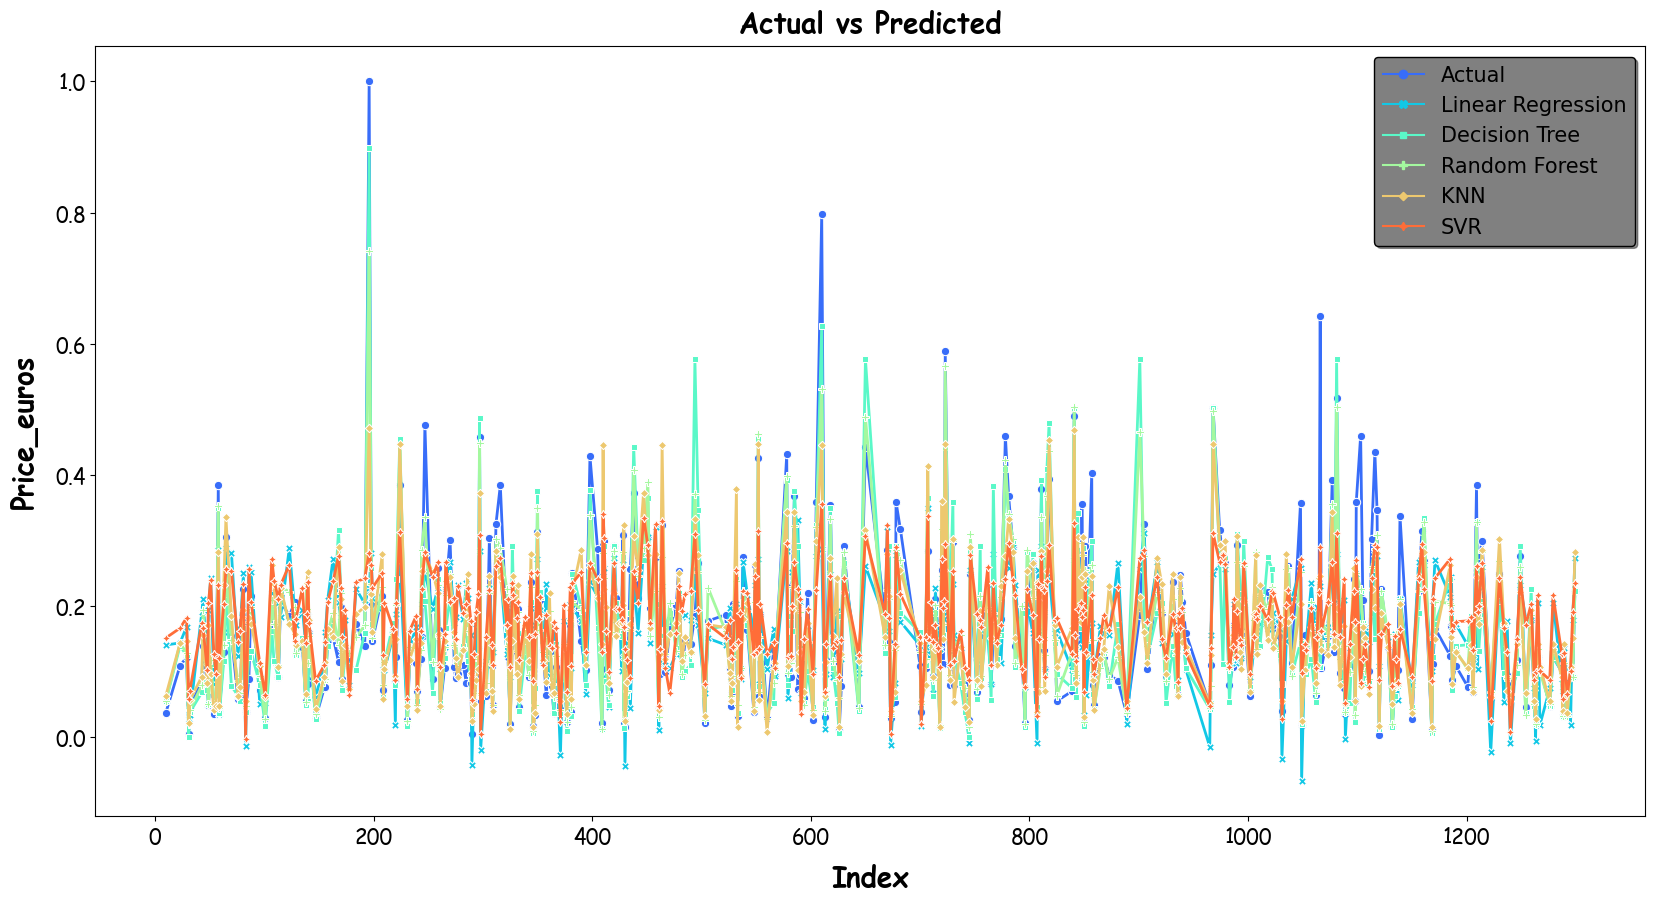

In [69]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = pred_compare, palette = 'rainbow', linewidth = 2.0, dashes = False, markers = True).set_title('Actual vs Predicted', fontsize = 20, fontweight = 'bold', fontname = 'Comic Sans MS', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xlabel('Index', fontsize = 20, fontweight = 'bold', fontname = 'Comic Sans MS', color = 'black', labelpad = 10.0)
plt.ylabel('Price_euros', fontsize = 20, fontweight = 'bold', fontname = 'Comic Sans MS', color = 'black', labelpad = 10.0)
plt.xticks(fontsize = 15,fontname = 'Comic Sans MS', color = 'black')
plt.yticks(fontsize = 15,fontname = 'Comic Sans MS', color = 'black')
plt.legend(loc = 'upper right', fontsize = 15, frameon = True, fancybox = True, shadow = True, facecolor = 'gray', edgecolor = 'black')
plt.show()

In [70]:
acc_compare = pd.DataFrame({'Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'KNN Regressor', 'SVR'], 'MSE': [lr_mse, dt_mse, rf_mse, knn_mse, svr_mse], 'MAE': [lr_mae, dt_mae, rf_mae, knn_mae, svr_mae], 'Accuracy': [lr_acc, dt_acc, rf_acc, knn_acc, svr_acc]})
acc_compare

,Model,MSE,MAE,Accuracy
0,Linear Regression,0.008895,0.065071,0.416872
1,Decision Tree Regression,0.005041,0.041461,0.669520
2,Random Forest Regression,0.002971,0.032006,0.805246
3,KNN Regressor,0.005527,0.043568,0.637626
4,SVR,0.007985,0.064014,0.476499


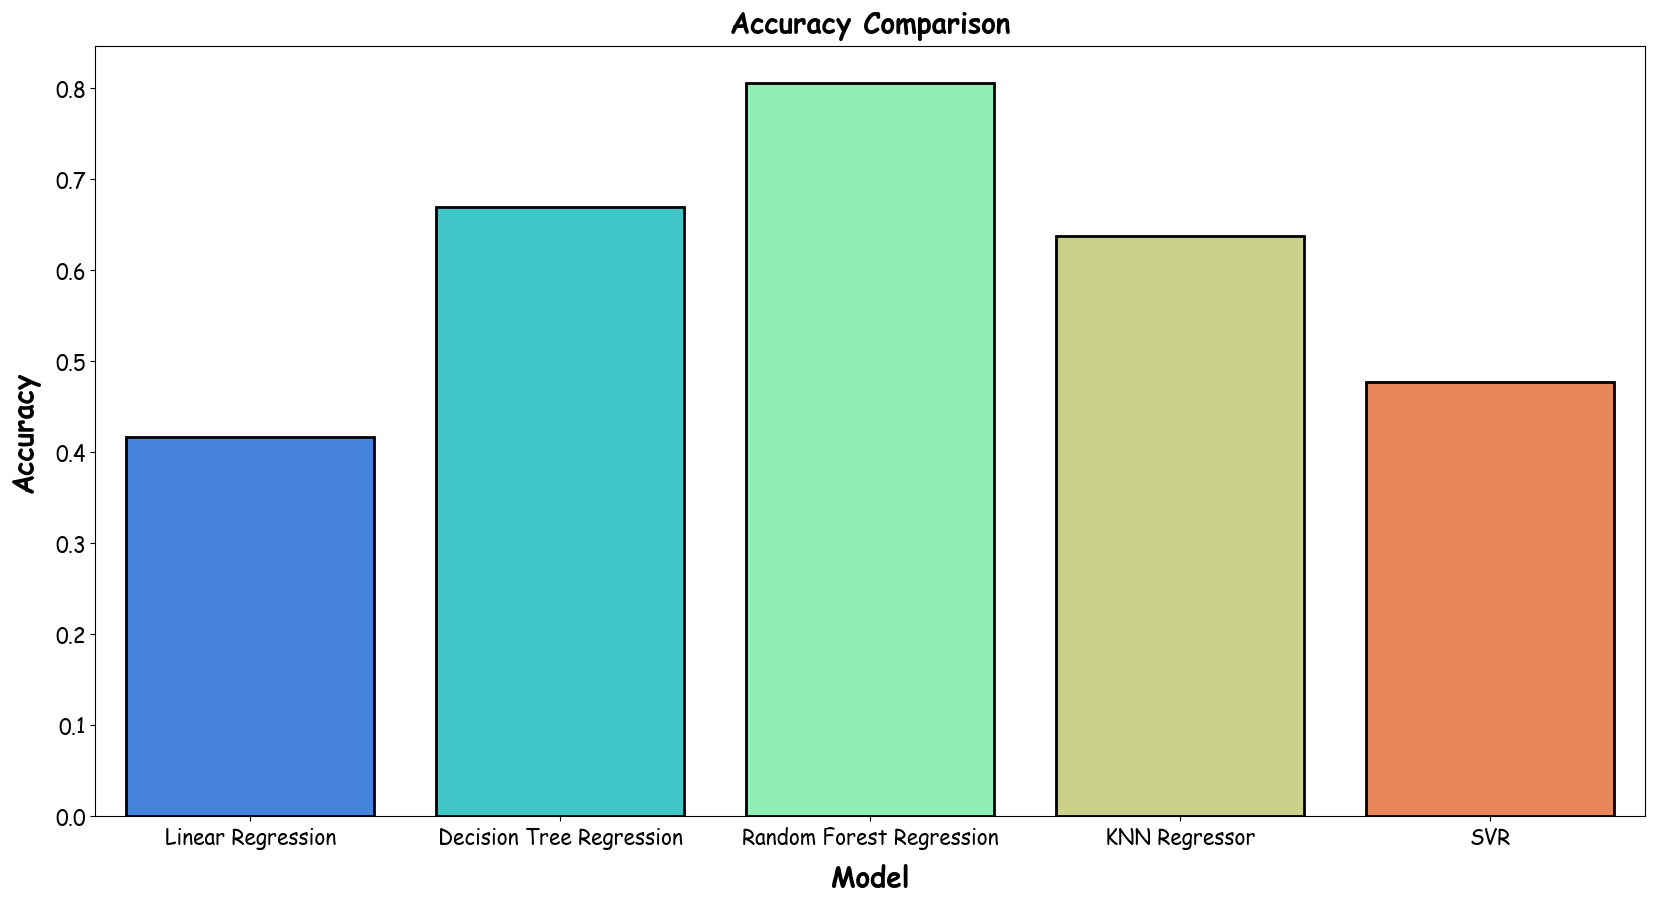

In [71]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'Model', y = 'Accuracy', data = acc_compare, palette = 'rainbow', linewidth = 2.0, edgecolor = 'black').set_title('Accuracy Comparison', fontsize = 20, fontweight = 'bold', fontname = 'Comic Sans MS', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xlabel('Model', fontsize = 20, fontweight = 'bold', fontname = 'Comic Sans MS', color = 'black', labelpad = 10.0)
plt.ylabel('Accuracy', fontsize = 20, fontweight = 'bold', fontname = 'Comic Sans MS', color = 'black', labelpad = 10.0)
plt.xticks(fontsize = 15,fontname = 'Comic Sans MS', color = 'black')
plt.yticks(fontsize = 15,fontname = 'Comic Sans MS', color = 'black')
plt.show()